Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
!pip install Augmentor

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import Augmentor
import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [ ]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [ ]:
File_Path = '/content/gdrive/MyDrive/CNN_assignment/Skin_cancer_ISIC/'
os.listdir(File_Path)

['Test', 'Train']

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(File_Path + "/" + "Train")
print(data_dir_train)
data_dir_test = pathlib.Path(File_Path + "/" + "Test")
print(data_dir_test)

/content/gdrive/MyDrive/CNN_assignment/Skin_cancer_ISIC/Train
/content/gdrive/MyDrive/CNN_assignment/Skin_cancer_ISIC/Test


In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180
seed=123

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, labels="inferred", label_mode='int', class_names=None,color_mode='rgb',batch_size=batch_size,
                                                               image_size=(img_height, img_width),shuffle=True, seed=seed,validation_split=0.2 , subset="training", interpolation='bilinear', follow_links=False)

Found 15739 files belonging to 9 classes.
Using 12592 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, labels="inferred", label_mode='int', class_names=None,color_mode='rgb',batch_size=batch_size,
                                                               image_size=(img_height, img_width),shuffle=True, seed=seed,validation_split=0.2 , subset="training", interpolation='bilinear', follow_links=False)

Found 15739 files belonging to 9 classes.
Using 12592 files for training.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

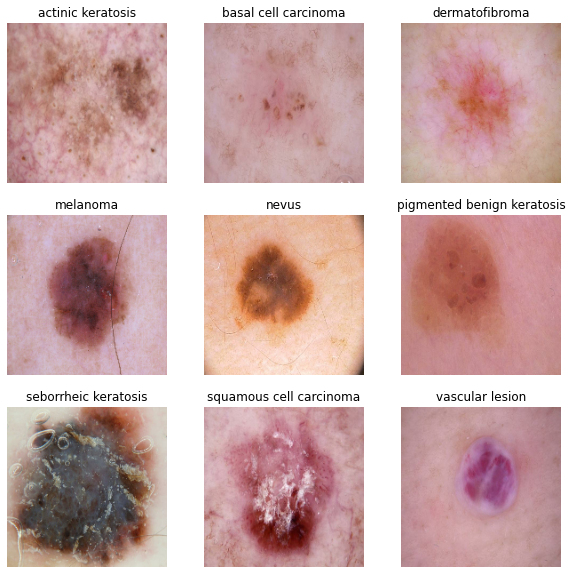

In [ ]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10,10))
class_names_len = len(class_names)
for i in range(class_names_len):
    filtered_ds = train_ds.filter(lambda x, l: tf.math.equal(l[0], i))
    for image, label in filtered_ds.take(1):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image[0].numpy().astype('uint8'))
        plt.title(class_names[label.numpy()[0]])
        plt.axis('off')

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here
Modle_input_shape = (img_width,img_height,3)
# Model 1
Mod_1 = tf.keras.Sequential([layers.experimental.preprocessing.Rescaling(1./225, input_shape=Modle_input_shape)])

Mod_1.add(Conv2D(32, (3, 3), activation='relu'))
Mod_1.add(MaxPooling2D(pool_size=(2,2)))
Mod_1.add(Dropout(0.2))

Mod_1.add(Conv2D(64, (3, 3), activation='relu'))
Mod_1.add(MaxPooling2D(pool_size=(2,2)))
Mod_1.add(Dropout(0.2))

Mod_1.add(Conv2D(64, (3, 3), activation='relu'))
Mod_1.add(MaxPooling2D(pool_size=(2,2)))
Mod_1.add(Dropout(0.2))

Mod_1.add(Flatten())
Mod_1.add(Dense(128, activation='relu'))
Mod_1.add(Dense(class_names_len, activation="softmax"))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
Mod_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epochs = 20
history = Mod_1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


In [ ]:
# View the summary of all layers
Mod_1.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_15 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_33 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 dropout_29 (Dropout)        (None, 89, 89, 32)        0         
                                                                 
 conv2d_34 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                

[0.3498665392398834, 0.508785605430603, 0.5925266742706299, 0.6643683314323425, 0.7215302586555481, 0.7518905401229858, 0.8143905401229858, 0.8311832547187805, 0.8426378965377808, 0.8645462393760681, 0.8848977088928223, 0.8816726207733154, 0.8963522911071777, 0.8977980613708496, 0.8951290249824524, 0.9098086953163147, 0.9225978851318359, 0.9157028198242188, 0.927157461643219, 0.9247108697891235]
[0.38567614555358887, 0.5791814923286438, 0.6522464156150818, 0.6158807873725891, 0.7951512336730957, 0.8292927145957947, 0.8520907759666443, 0.8714413046836853, 0.8909029960632324, 0.8795596361160278, 0.9175934195518494, 0.9192615747451782, 0.9217081665992737, 0.8996886014938354, 0.9279359579086304, 0.9260453581809998, 0.9251556992530823, 0.9382784962654114, 0.952290952205658, 0.9416147470474243]
[1.6982468366622925, 1.3130472898483276, 1.1274302005767822, 0.9249887466430664, 0.7718972563743591, 0.6859248876571655, 0.5267153978347778, 0.46377578377723694, 0.42328396439552307, 0.365038126707077

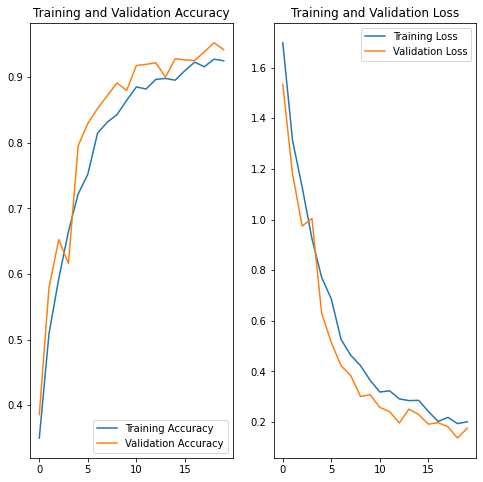

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print(acc)
print(val_acc)

loss = history.history['loss']
val_loss = history.history['val_loss']

print(loss)
print(val_loss)

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
Mod_2 = tf.keras.Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=Modle_input_shape)])

Mod_2.add(Conv2D(32, (3, 3), activation='relu'))
Mod_2.add(MaxPooling2D(pool_size=(2, 2)))
Mod_2.add(Dropout(0.2))

Mod_2.add(Conv2D(32, (3, 3), activation='relu'))
Mod_2.add(MaxPooling2D(pool_size=(2, 2)))
Mod_2.add(Dropout(0.2))

Mod_2.add(Flatten())

Mod_2.add(Dense(128, activation='relu'))

Mod_2.add(Dense(class_names_len, activation='softmax'))

In [ ]:
Mod_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
Mod_2.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_16 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_36 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 dropout_32 (Dropout)        (None, 89, 89, 32)        0         
                                                                 
 conv2d_37 (Conv2D)          (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 43, 43, 32)       0         
 g2D)                                                

In [ ]:
epochs = 20
history = Mod_2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
281/281 [==============================] - 18s 61ms/step - loss: 2.4126 - accuracy: 0.1267 - val_loss: 2.1890 - val_accuracy: 0.1336
Epoch 2/20
281/281 [==============================] - 17s 60ms/step - loss: 1.9154 - accuracy: 0.2649 - val_loss: 1.6775 - val_accuracy: 0.4109
Epoch 3/20
281/281 [==============================] - 17s 60ms/step - loss: 1.4609 - accuracy: 0.4596 - val_loss: 1.4405 - val_accuracy: 0.4842
Epoch 4/20
281/281 [==============================] - 17s 60ms/step - loss: 1.2073 - accuracy: 0.5657 - val_loss: 1.1955 - val_accuracy: 0.5882
Epoch 5/20
281/281 [==============================] - 17s 60ms/step - loss: 0.9847 - accuracy: 0.6516 - val_loss: 0.9601 - val_accuracy: 0.6637
Epoch 6/20
281/281 [==============================] - 17s 60ms/step - loss: 0.8167 - accuracy: 0.7084 - val_loss: 0.7576 - val_accuracy: 0.7490
Epoch 7/20
281/281 [==============================] - 17s 60ms/step - loss: 0.6675 - accuracy: 0.7666 - val_loss: 0.5366 - val_accuracy:

[0.12666815519332886, 0.26490214467048645, 0.4596307873725891, 0.5657250881195068, 0.6515792012214661, 0.708407461643219, 0.7665702700614929, 0.8058273792266846, 0.8500889539718628, 0.8706628084182739, 0.8813389539718628, 0.9035809636116028, 0.921040952205658, 0.9164813160896301, 0.9297152757644653, 0.9327179789543152, 0.9369439482688904, 0.9353870153427124, 0.9427268505096436, 0.9412811398506165]
[0.13356316089630127, 0.4109208285808563, 0.48420819640159607, 0.5881894826889038, 0.663701057434082, 0.7489991188049316, 0.8252891302108765, 0.7912588715553284, 0.8870106935501099, 0.9129226207733154, 0.8942393064498901, 0.9357206225395203, 0.9224866628646851, 0.9338300824165344, 0.94650799036026, 0.9479537606239319, 0.9459519386291504, 0.9501779079437256, 0.9492882490158081, 0.9497330784797668]
[2.4126052856445312, 1.9154293537139893, 1.4608720541000366, 1.2072678804397583, 0.9847236275672913, 0.8167345523834229, 0.6674648523330688, 0.5565412044525146, 0.4438876807689667, 0.3758960366249084

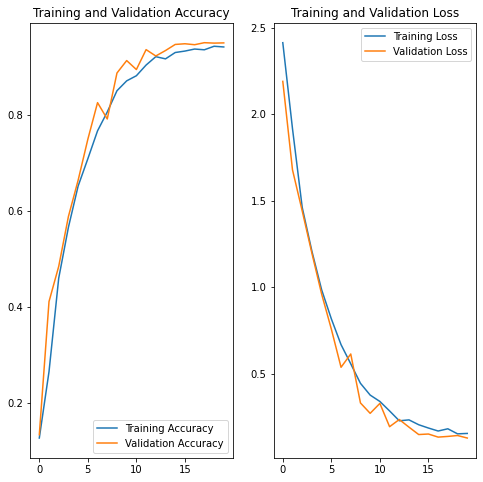

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print(acc)
print(val_acc)

loss = history.history['loss']
val_loss = history.history['val_loss']

print(loss)
print(val_loss)

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
Mod_3 = tf.keras.Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=Modle_input_shape)])

Mod_3.add(Conv2D(32, (3, 3), activation='relu'))
Mod_3.add(MaxPooling2D(pool_size=(2, 2)))
Mod_3.add(Dropout(0.2))

Mod_3.add(Conv2D(32, (3, 3), activation='relu'))
Mod_3.add(MaxPooling2D(pool_size=(2, 2)))
Mod_3.add(Dropout(0.2))

Mod_3.add(Flatten())

Mod_3.add(Dense(128, activation='relu'))

Mod_3.add(Dense(class_names_len, activation='softmax'))

In [ ]:
Mod_3.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_17 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_38 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 dropout_34 (Dropout)        (None, 89, 89, 32)        0         
                                                                 
 conv2d_39 (Conv2D)          (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 43, 43, 32)       0         
 g2D)                                                

In [ ]:
#compile model
Mod_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#fit the model 
history = Mod_3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
281/281 [==============================] - 18s 61ms/step - loss: 2.0896 - accuracy: 0.2293 - val_loss: 1.7029 - val_accuracy: 0.3655
Epoch 2/20
281/281 [==============================] - 17s 61ms/step - loss: 1.4429 - accuracy: 0.4516 - val_loss: 1.3555 - val_accuracy: 0.5427
Epoch 3/20
281/281 [==============================] - 17s 60ms/step - loss: 1.1836 - accuracy: 0.5723 - val_loss: 1.1987 - val_accuracy: 0.5821
Epoch 4/20
281/281 [==============================] - 17s 60ms/step - loss: 0.9761 - accuracy: 0.6526 - val_loss: 0.9421 - val_accuracy: 0.7070
Epoch 5/20
281/281 [==============================] - 17s 59ms/step - loss: 0.8008 - accuracy: 0.7141 - val_loss: 0.7046 - val_accuracy: 0.7850
Epoch 6/20
281/281 [==============================] - 17s 59ms/step - loss: 0.6651 - accuracy: 0.7637 - val_loss: 0.5874 - val_accuracy: 0.8265
Epoch 7/20
281/281 [==============================] - 17s 60ms/step - loss: 0.5149 - accuracy: 0.8255 - val_loss: 0.4566 - val_accuracy:

[0.22931495308876038, 0.45162367820739746, 0.5722864866256714, 0.6525800824165344, 0.7140792012214661, 0.7636788487434387, 0.8255115747451782, 0.8603202700614929, 0.8787811398506165, 0.8941280841827393, 0.9132562279701233, 0.924043595790863, 0.9224866628646851, 0.9336076378822327, 0.9323843121528625, 0.9425044655799866, 0.9397242069244385, 0.9422820210456848, 0.9452847242355347, 0.9397242069244385]
[0.36554715037345886, 0.5427046418190002, 0.5820729732513428, 0.7069617509841919, 0.7850311398506165, 0.8265124559402466, 0.8639901876449585, 0.8917927145957947, 0.9154804348945618, 0.9334964156150818, 0.9445062279701233, 0.949399471282959, 0.9498443007469177, 0.953959047794342, 0.9505115747451782, 0.9468416571617126, 0.9591859579086304, 0.9489546418190002, 0.9622998237609863, 0.9096975326538086]
[2.08955454826355, 1.442897915840149, 1.1835952997207642, 0.9760740995407104, 0.8008270263671875, 0.6650921106338501, 0.5149181485176086, 0.4140826165676117, 0.3521363437175751, 0.30550575256347656,

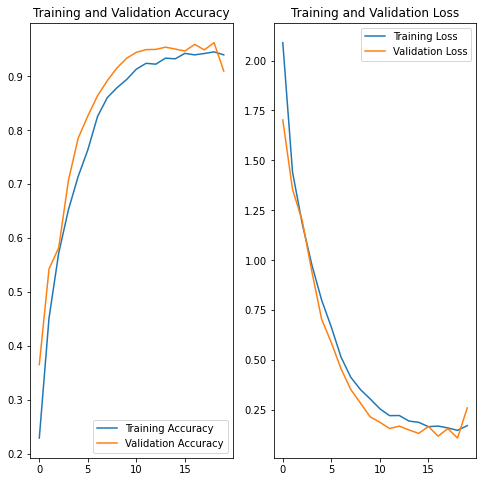

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print(acc)
print(val_acc)

loss = history.history['loss']
val_loss = history.history['val_loss']

print(loss)
print(val_loss)

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Train the model

### Visualizing training results

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here
Clearly Model is an over fit  from the Plot Graph above
There is a huge difference between training and validations sets for both accuracy and Loss
This is a clear indication that the model memorized the input data, in order to fix the same lets try with transforming the data by inscresing variance 

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.3),
])

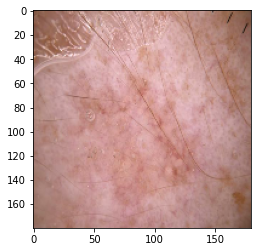

In [ ]:
# get an img
image, label = next(iter(train_ds))
plt.imshow(image[0].numpy().astype("uint8"))

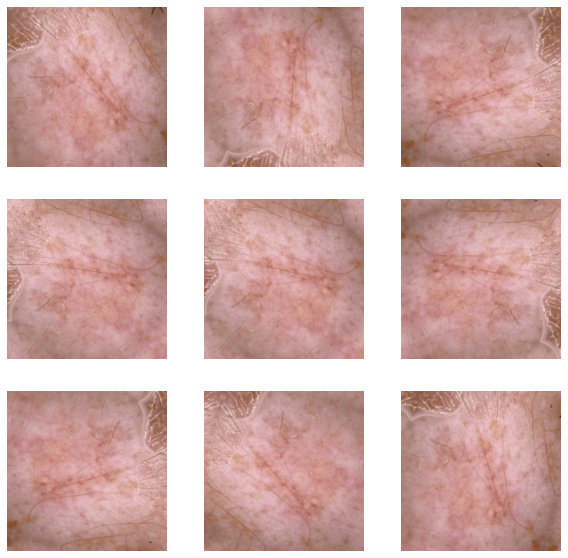

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0].numpy().astype("uint8"))
  plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
Tran_model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=Modle_input_shape),
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2)])

Tran_model.add(Conv2D(32, (3, 3), activation='relu'))
Tran_model.add(MaxPooling2D(pool_size=(2, 2)))

Tran_model.add(Conv2D(64, (3, 3), activation='relu'))
Tran_model.add(MaxPooling2D(pool_size=(2, 2)))

Tran_model.add(Flatten())

Tran_model.add(Dense(128, activation='relu'))

Tran_model.add(Dense(class_names_len, activation='softmax'))



In [ ]:
## Your code goes here
Tran_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
Tran_model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_18 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 random_flip_14 (RandomFlip)  (None, 180, 180, 3)      0         
                                                                 
 random_rotation_14 (RandomR  (None, 180, 180, 3)      0         
 otation)                                                        
                                                                 
 conv2d_40 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 87, 87, 64)      

In [ ]:
# Fit the model
history = Tran_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
281/281 [==============================] - 23s 78ms/step - loss: 1.7488 - accuracy: 0.3530 - val_loss: 1.4234 - val_accuracy: 0.4535
Epoch 2/20
281/281 [==============================] - 22s 78ms/step - loss: 1.4178 - accuracy: 0.4437 - val_loss: 1.3091 - val_accuracy: 0.4988
Epoch 3/20
281/281 [==============================] - 22s 78ms/step - loss: 1.3397 - accuracy: 0.4820 - val_loss: 1.2843 - val_accuracy: 0.5061
Epoch 4/20
281/281 [==============================] - 22s 77ms/step - loss: 1.2663 - accuracy: 0.5049 - val_loss: 1.2304 - val_accuracy: 0.5229
Epoch 5/20
281/281 [==============================] - 22s 77ms/step - loss: 1.1832 - accuracy: 0.5397 - val_loss: 1.0862 - val_accuracy: 0.5722
Epoch 6/20
281/281 [==============================] - 22s 77ms/step - loss: 1.1546 - accuracy: 0.5485 - val_loss: 1.0595 - val_accuracy: 0.5872
Epoch 7/20
281/281 [==============================] - 22s 78ms/step - loss: 1.1227 - accuracy: 0.5698 - val_loss: 1.0278 - val_accuracy:

[0.35298043489456177, 0.4437277615070343, 0.4819839894771576, 0.5048932433128357, 0.5397019386291504, 0.5484875440597534, 0.5698398351669312, 0.5614991188049316, 0.6000889539718628, 0.6089857816696167, 0.6326735019683838, 0.6401245594024658, 0.6535809636116028, 0.6565836071968079, 0.6742660403251648, 0.6842749118804932, 0.694951057434082, 0.6882784962654114, 0.7072953581809998, 0.7181939482688904]
[0.4535142481327057, 0.49877670407295227, 0.5061165690422058, 0.5229092240333557, 0.5721752643585205, 0.5871886014938354, 0.6083185076713562, 0.5869662165641785, 0.6328958868980408, 0.6515792012214661, 0.6633674502372742, 0.6284475326538086, 0.6832740306854248, 0.6550266742706299, 0.6678158640861511, 0.6790480613708496, 0.7329849004745483, 0.6898354291915894, 0.7469973564147949, 0.7384341359138489]
[1.7487645149230957, 1.4178158044815063, 1.3396660089492798, 1.266290545463562, 1.1832040548324585, 1.1545647382736206, 1.122727632522583, 1.127773642539978, 1.033046007156372, 1.0212817192077637, 

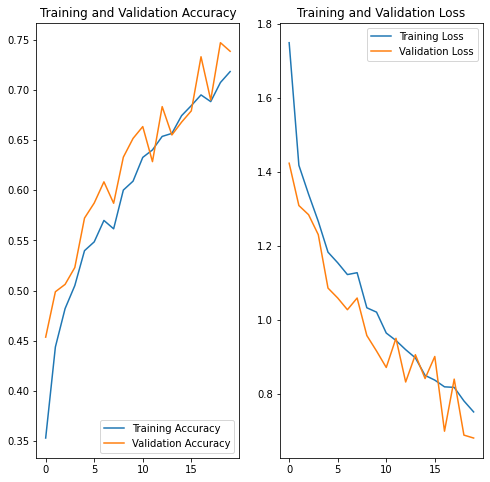

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print(acc)
print(val_acc)

loss = history.history['loss']
val_loss = history.history['val_loss']

print(loss)
print(val_loss)

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# using Dropout layer as there is an evidence of overfitting
Tran_model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=Modle_input_shape),
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2)])

Tran_model.add(Conv2D(32, (3, 3), activation='relu'))
Tran_model.add(MaxPooling2D(pool_size=(2, 2)))
Tran_model.add(Dropout(0.1))

Tran_model.add(Conv2D(64, (3, 3), activation='relu'))
Tran_model.add(MaxPooling2D(pool_size=(2, 2)))
Tran_model.add(Dropout(0.1))

Tran_model.add(Flatten())
Tran_model.add(Dense(128, activation='relu'))
Tran_model.add(Dense(class_names_len, activation='softmax'))

In [ ]:
# compiling model
Tran_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Tran_model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_19 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 random_flip_15 (RandomFlip)  (None, 180, 180, 3)      0         
                                                                 
 random_rotation_15 (RandomR  (None, 180, 180, 3)      0         
 otation)                                                        
                                                                 
 conv2d_42 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 dropout_36 (Dropout)        (None, 89, 89, 32)      

In [ ]:
history = Tran_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
281/281 [==============================] - 24s 83ms/step - loss: 2.1758 - accuracy: 0.2256 - val_loss: 1.8121 - val_accuracy: 0.3364
Epoch 2/20
281/281 [==============================] - 23s 83ms/step - loss: 1.5748 - accuracy: 0.3916 - val_loss: 1.5690 - val_accuracy: 0.3955
Epoch 3/20
281/281 [==============================] - 23s 83ms/step - loss: 1.4214 - accuracy: 0.4467 - val_loss: 1.3962 - val_accuracy: 0.4512
Epoch 4/20
281/281 [==============================] - 23s 82ms/step - loss: 1.3450 - accuracy: 0.4696 - val_loss: 1.3062 - val_accuracy: 0.4943
Epoch 5/20
281/281 [==============================] - 23s 83ms/step - loss: 1.3111 - accuracy: 0.4883 - val_loss: 1.3692 - val_accuracy: 0.4631
Epoch 6/20
281/281 [==============================] - 23s 84ms/step - loss: 1.2823 - accuracy: 0.4907 - val_loss: 1.2673 - val_accuracy: 0.5060
Epoch 7/20
281/281 [==============================] - 23s 83ms/step - loss: 1.2389 - accuracy: 0.5128 - val_loss: 1.3547 - val_accuracy:

[0.2256450206041336, 0.3915702700614929, 0.44673043489456177, 0.46963968873023987, 0.4883229434490204, 0.49065837264060974, 0.5127891302108765, 0.5270240306854248, 0.5500444769859314, 0.5630560517311096, 0.5832962393760681, 0.6002001762390137, 0.6088745594024658, 0.620551586151123, 0.6283363103866577, 0.6525800824165344, 0.6590302586555481, 0.6798264980316162, 0.6744884252548218, 0.6953958868980408]
[0.33641013503074646, 0.39546263217926025, 0.45117881894111633, 0.4943282902240753, 0.4630782902240753, 0.5060053467750549, 0.48009341955184937, 0.5780693888664246, 0.5425934195518494, 0.5756227970123291, 0.6068727970123291, 0.5787366628646851, 0.6610320210456848, 0.654693067073822, 0.6693727970123291, 0.6551378965377808, 0.6576957106590271, 0.6951735019683838, 0.6893905401229858, 0.7159697413444519]
[2.175783395767212, 1.5748072862625122, 1.4213825464248657, 1.3449896574020386, 1.311126947402954, 1.2822743654251099, 1.2389004230499268, 1.2130833864212036, 1.1524380445480347, 1.129304766654

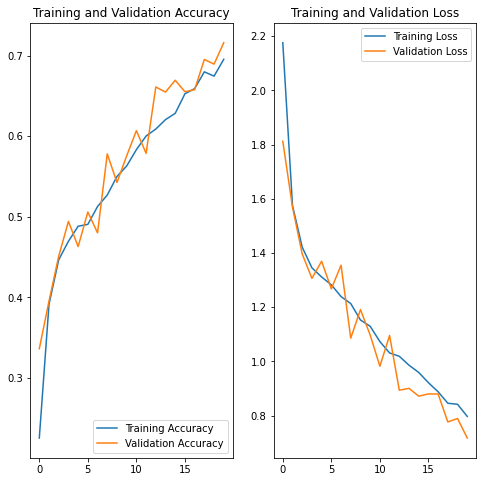

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print(acc)
print(val_acc)

loss = history.history['loss']
val_loss = history.history['val_loss']

print(loss)
print(val_loss)

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Compiling the model

### Training the model

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?
From the above graph there is no evidence of overfit or underfit as there is no considerable difference between accuracies of training and test data, but the value of accuracy has reduced considerabley

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
## Your code goes here.
folders = ([name for name in os.listdir(data_dir_train)
            if os.path.isdir(os.path.join(data_dir_train, name))]) # get all directories 
for folder in folders:
    print(folder,len(list((data_dir_train / folder).glob('*.jpg'))), sep = " : ")

NameError: ignored

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples? 
    Ans : seborrheic keratosis : 77
#### - Which classes dominate the data in terms proportionate number of samples?
    Ans : pigmented benign keratosis : 462


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset=data_dir_train
print(data_dir_train)
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset / i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

/content/gdrive/MyDrive/CNN_assignment/Skin_cancer_ISIC/Train
Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin_cancer_ISIC/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F015AA5D8D0>: 100%|██████████| 500/500 [00:21<00:00, 22.78 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin_cancer_ISIC/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F01598C2FD0>: 100%|██████████| 500/500 [00:22<00:00, 22.51 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin_cancer_ISIC/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F015973DD50>: 100%|██████████| 500/500 [00:23<00:00, 20.85 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin_cancer_ISIC/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F0159813B50>: 100%|██████████| 500/500 [01:54<00:00,  4.35 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin_cancer_ISIC/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F0241174650>: 100%|██████████| 500/500 [01:38<00:00,  5.10 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin_cancer_ISIC/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0240E72690>: 100%|██████████| 500/500 [00:22<00:00, 21.83 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin_cancer_ISIC/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F0159878C90>: 100%|██████████| 500/500 [00:52<00:00,  9.52 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin_cancer_ISIC/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0240C90550>: 100%|██████████| 500/500 [00:23<00:00, 21.49 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin_cancer_ISIC/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F015E3B2050>: 100%|██████████| 500/500 [00:23<00:00, 21.10 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

13500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
path_list_new = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

NameError: ignored

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [ ]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [ ]:
original_df = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
original_df.head(5)

,Path,Label
0,/content/gdrive/MyDrive/CNN_assignment/Skin_ca...,actinic keratosis
1,/content/gdrive/MyDrive/CNN_assignment/Skin_ca...,actinic keratosis
2,/content/gdrive/MyDrive/CNN_assignment/Skin_ca...,actinic keratosis
3,/content/gdrive/MyDrive/CNN_assignment/Skin_ca...,actinic keratosis
4,/content/gdrive/MyDrive/CNN_assignment/Skin_ca...,actinic keratosis


In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df['Label'].value_counts()

pigmented benign keratosis    3000
melanoma                      3000
actinic keratosis             3000
dermatofibroma                3000
seborrheic keratosis          3000
vascular lesion               3000
squamous cell carcinoma       3000
nevus                         3000
basal cell carcinoma          3000
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
data_dir_train=pathlib.Path(File_Path + "/" + "Train")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15739 files belonging to 9 classes.
Using 12592 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  batch_size=batch_size)

Found 15739 files belonging to 9 classes.
Using 3147 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
## your code goes here
model_fin = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=Modle_input_shape),
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2)])

model_fin.add(Conv2D(32, (3, 3), activation='relu'))
model_fin.add(MaxPooling2D(pool_size=(2, 2)))
model_fin.add(Dropout(0.1))

model_fin.add(Conv2D(64, (3, 3), activation='relu'))
model_fin.add(MaxPooling2D(pool_size=(2, 2)))
model_fin.add(Dropout(0.1))

model_fin.add(Flatten())

model_fin.add(Dense(128, activation='relu'))

model_fin.add(Dense(class_names_len, activation='softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
model_fin.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Get the summary of the model 
model_fin.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_20 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 random_flip_16 (RandomFlip)  (None, 180, 180, 3)      0         
                                                                 
 random_rotation_16 (RandomR  (None, 180, 180, 3)      0         
 otation)                                                        
                                                                 
 conv2d_44 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 dropout_38 (Dropout)        (None, 89, 89, 32)      

#### **Todo:**  Train your model

In [ ]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model_fin.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
393/394 [============================>.] - ETA: 0s - loss: 2.0064 - accuracy: 0.2748

ValueError: ignored

#### **Todo:**  Visualize the model results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?
From the above graph its evident that reblancing helped the model to get rid of overfitting / underfitting 
now our training & validation accuracies are closer together
